In [9]:
import xarray
import cartopy
import cmocean
import matplotlib.pyplot as mp
import numpy

In [7]:
root_dir = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30years.cam0400.clm0400/atm/hist/'
atm400_mfds = xarray.open_mfdataset(root_dir + '*.nc')

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [9]:
root_dir = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30years.cam0400.clm1000/atm/hist/'
atm1000_mfds = xarray.open_mfdataset(root_dir + '*.nc')

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [10]:
prect_400 = atm400_mfds['PRECC']+atm400_mfds['PRECL']
prect_1000 = atm1000_mfds['PRECC']+atm1000_mfds['PRECL']

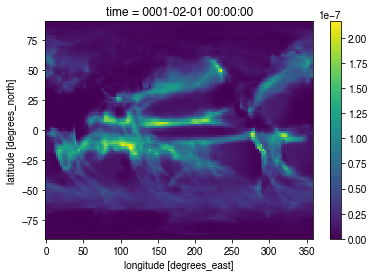

In [12]:
prect_400.isel(time=0).plot()

In [13]:
prect_diff = prect_1000 - prect_400

In [18]:
prect_diff_mean = prect_diff.mean(dim='time').values

In [20]:
lon = prect_diff['lon'].values
lat = prect_diff['lat'].values

In [42]:
lon_ = numpy.zeros(lon.size+2)
lon_[1:-1] = lon
lon_[0] = lon[0]-numpy.diff(lon)[0]
lon_[-1] = lon[-1]+numpy.diff(lon)[-1]

lon_mid = lon_[:-1]+0.5*(numpy.diff(lon_))

lat_ = numpy.zeros(lat.size+2)
lat_[1:-1] = lat
lat_[0] = lat[0]-numpy.diff(lat)[0]
lat_[-1] = lat[-1]+numpy.diff(lat)[-1]

lat_mid = lat_[:-1]+0.5*(numpy.diff(lat_))

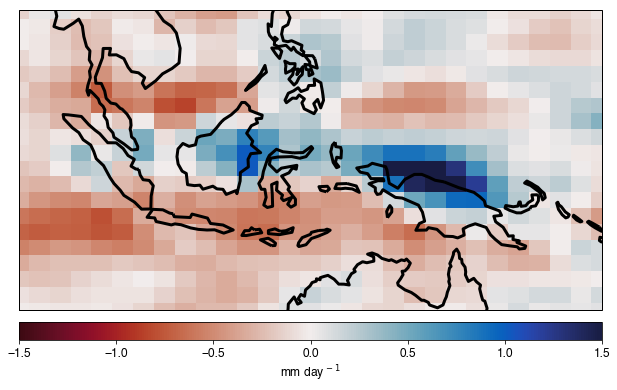

In [74]:
fig, ax = mp.subplots(1,1, subplot_kw={'projection':cartopy.crs.PlateCarree()})

fig.set_size_inches(8.5,5)
ax.set_extent([90,160,-15,15])
ax.coastlines(resolution='110m', lw=3)

precip_plot = ax.pcolormesh(lon_mid, lat_mid, prect_diff_mean*86400.*1000., \
                            vmin=-1.5,vmax=1.5,cmap=cmocean.cm.balance_r)

# levels = numpy.arange(-2,2.1,0.25)
# precip_plot = ax.contourf(lon, lat, prect_diff_mean*86400.*1000., \
#                           levels=levels,cmap=cmocean.cm.balance_r, extend='both')

fig.tight_layout()
axpos = ax.get_position()

cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.03,axpos.width,0.05])
cbar = mp.colorbar(precip_plot, orientation='horizontal', cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

fig.savefig('../figures/cesm1_phys_response_20years_indonesia_zoom.png', bbox_inches='tight', transparent=True)

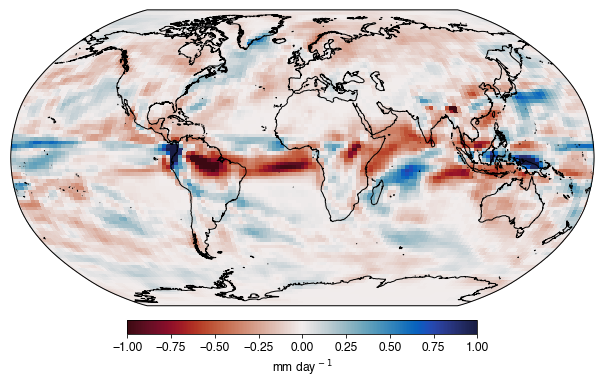

In [69]:
fontsize=12

data_crs = cartopy.crs.PlateCarree()
map_crs = cartopy.crs.Robinson()

fig, ax = mp.subplots(1,1, subplot_kw={'projection':map_crs})

fig.set_size_inches(8.5,5)
#ax.set_extent([90,160,-15,15])
ax.coastlines(resolution='50m')

precip_plot = ax.pcolormesh(lon_mid, lat_mid, prect_diff_mean*86400.*1000., \
                            vmin=-1,vmax=1,cmap=cmocean.cm.balance_r, transform=data_crs, rasterized=True)

# levels = numpy.arange(-2,2.1,0.25)
# precip_plot = ax.contourf(lon, lat, prect_diff_mean*86400.*1000., \
#                           levels=levels,cmap=cmocean.cm.balance_r, extend='both', transform=data_crs)

fig.tight_layout()
axpos = ax.get_position()

size = 0.6
cbar_ax = fig.add_axes([axpos.x0+0.5*axpos.width*(1-size),\
                        axpos.y0-0.02,\
                        axpos.width*size,\
                        0.04])
cbar = mp.colorbar(precip_plot, orientation='horizontal', cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

fig.savefig('../figures/cesm1_phys_response_20years.png', bbox_inches='tight', transparent=True)